<a href="https://colab.research.google.com/github/danilodcabotelho/DSWP_alunos/blob/main/Labdata_Churn_Analise_Dados_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Labdata Churn - Kaggle - Início dos trabalhos: 07 - 11 - 2020

---


## 1. Análise dos Dados - Início

---



# Carregamento e Visualização dos Dados

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyplot
from sklearn import preprocessing
from pprint import pprint

In [6]:
# Carregando o dataframe de Treino e df_teste
df_treino = pd.read_csv('/content/train.csv')
df_teste = pd.read_csv('/content/test.csv')
df_treino.head(3)

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0


In [7]:
# Dimensão do df_treino
df_treino.shape, df_teste.shape

((5634, 21), (1409, 20))

DataFrame Treino possui 21 colunas e 5634 linhas \
DataFrame Teste possui 20 colunas e 1409 linhas

In [35]:
# NATUREZA DOS DADOS NO DF_TREINO
colunas = df_treino.columns
colunas

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
# Verificando as tipicidades das informações dentro de cada variável, excluindo a id

for i in colunas:
  if i != 'id':
    print(df_treino[i].value_counts())



Male      2849
Female    2785
Name: gender, dtype: int64
0    4740
1     894
Name: SeniorCitizen, dtype: int64
No     2902
Yes    2732
Name: Partner, dtype: int64
No     3793
Yes    1623
Name: Dependents, dtype: int64
1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
       ... 
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, Length: 73, dtype: int64
Yes    5082
No      552
Name: PhoneService, dtype: int64
No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64
Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64
No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64
No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64
No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype

# TRATANDO AS VARIÁVEIS
 Conhecendo e tratando as **variáveis**




# copia do dataframe df_treino para df_treino1

###INÍCIO TRATAMENTO VARIÁVEL GENDER (SEXO)

In [96]:
# Variável GENDER
# Vamos transformá-la com labelencoder em binário
# COPIA DO DATAFRAME DE TREINO PARA O TRATAMENTO
df_treino1 = df_treino.copy()
df_treino1['gender'].value_counts()

Male      2849
Female    2785
Name: gender, dtype: int64

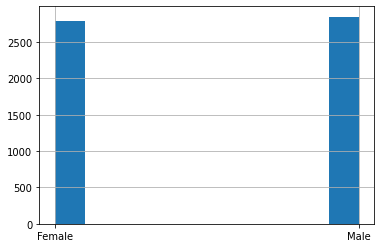

In [97]:
# Dataframe está balanceado.
df_treino1['gender'].hist();

In [66]:
# transformação com LabelEncoder. Criada Coluna gender_le: '0' -> Female e '1' -> Male
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_treino1['gender_le'] = le.fit_transform(df_treino1['gender'])
df_treino1.head()


,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_le
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [92]:
# Confirmando a transformação label Encoder da gender:
print(df_treino1['gender_le'].value_counts())
print('  ')
print(df_treino['gender'].value_counts())


1    2849
0    2785
Name: gender_le, dtype: int64
  
Male      2849
Female    2785
Name: gender, dtype: int64


In [91]:
df_treino1['gender'] = df_treino1['gender_le']
df_treino1.drop(columns = 'gender_le', axis = 1)
df_treino1.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_le
0,4030,0,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,0,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [128]:
df_treino1['gender'].describe()

count     5634
unique       2
top       Male
freq      2849
Name: gender, dtype: object

## VARIÁVEL SeniorCitizen

In [98]:
# Vejamos a distribuição da SeniorCitizen (IDOSO)
df_treino1['SeniorCitizen'].value_counts()

0    4740
1     894
Name: SeniorCitizen, dtype: int64

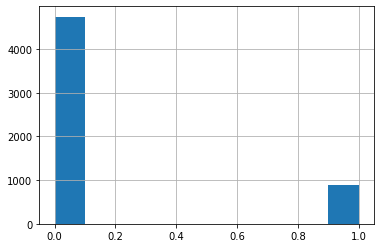

In [101]:
# Está desbalanceado.
df_treino1['SeniorCitizen'].hist();

In [123]:
print(f'Percentual de Idosos (SeniorCitizen) = 1: ', 
      (100*((df_treino1['SeniorCitizen']==1).sum())/((df_treino1['SeniorCitizen']).count())).round(2), ' %')

Percentual de Idosos (SeniorCitizen) = 1:  15.87  %


In [127]:
# Parece que a variável 0 ou 1 é float64. Vamos transformá-la em categórica
df_treino1['SeniorCitizen'].describe()

count    5634.000000
mean        0.158679
std         0.365409
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [129]:
df_treino1['SeniorCitizen'] = df_treino1['SeniorCitizen'].astype('category')
df_treino1['SeniorCitizen'].describe()

count     5634
unique       2
top          0
freq      4740
Name: SeniorCitizen, dtype: int64